<a href="https://colab.research.google.com/github/Mayurrathod1/Stock_Market_Forcasting/blob/main/ARIMA_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.9 MB/s eta 0:00:00


In [ ]:
#import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta, timezone
from time import time
from pmdarima.arima import auto_arima

In [ ]:
# Set the ticker symbol for Apple
ticker_symbol = 'AAPL'

# Download historical data for the specified ticker and time period from Yahoo Finance
data = yf.download(ticker_symbol, start="2000-01-01", end="2023-12-31", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df=pd.DataFrame(data)
df['Date'] = pd.to_datetime(df.index) # Assuming your index is Date column
df.index = df['Date'].dt.strftime('%Y-%m-%d')
df = df.drop(columns=['Date']) # Drop the original 'Date' column
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2000-01-03,0.843077,0.999442,1.004464,0.907924,0.936384,535796800
2000-01-04,0.771997,0.915179,0.987723,0.903460,0.966518,512377600
2000-01-05,0.783293,0.928571,0.987165,0.919643,0.926339,778321600
2000-01-06,0.715508,0.848214,0.955357,0.848214,0.947545,767972800
2000-01-07,0.749402,0.888393,0.901786,0.852679,0.861607,460734400


In [ ]:
df.info()

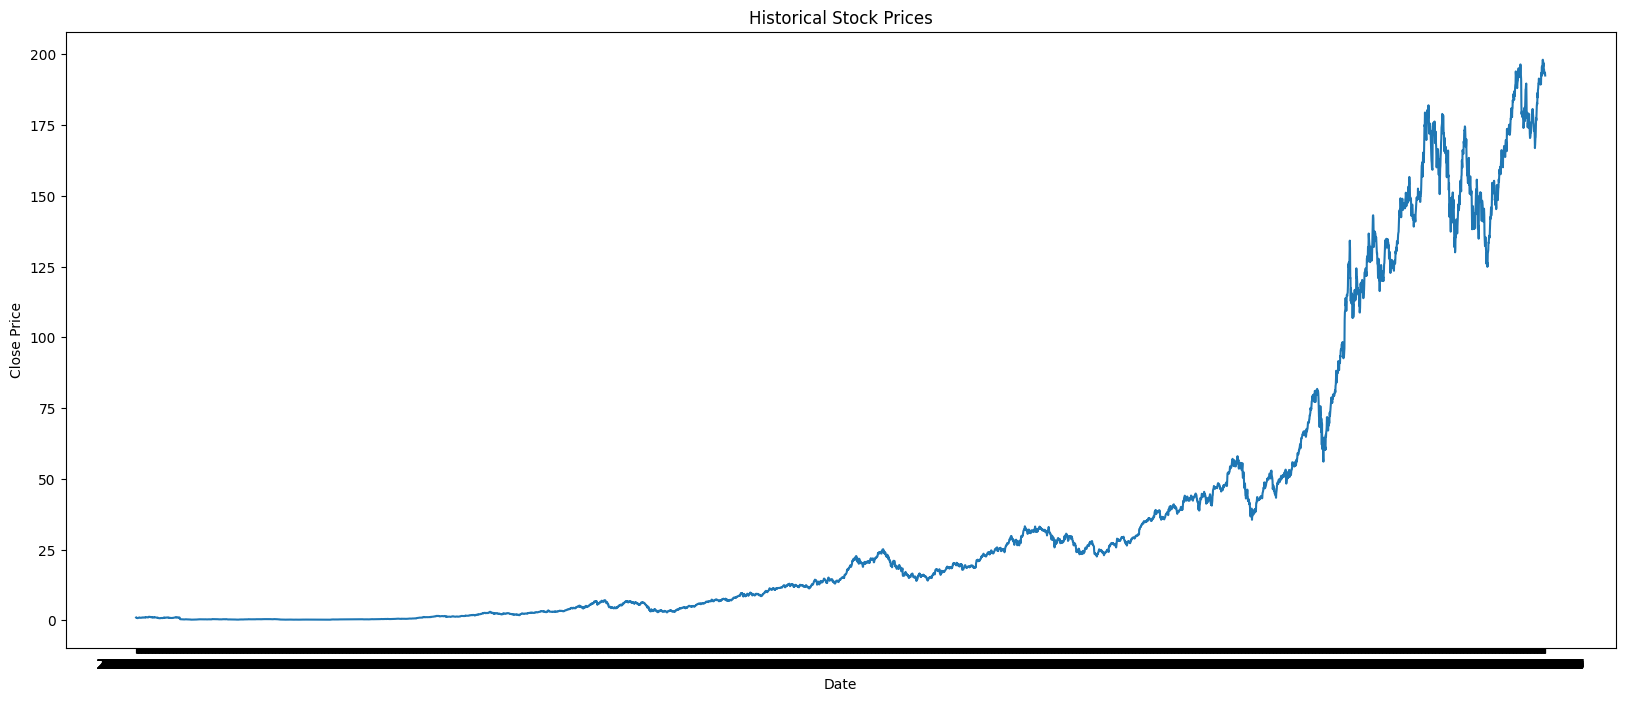

In [ ]:
# Plotting
plt.figure(figsize=(20, 8))
plt.plot(df['Close'])
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
# Splitting the data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data['Close'][:train_size]
test_data = data['Close'][train_size:]
print(train_data)
print(test_data)

Ticker           AAPL
Date                 
2000-01-03   0.999442
2000-01-04   0.915179
2000-01-05   0.928571
2000-01-06   0.848214
2000-01-07   0.888393
...               ...
2019-03-08  43.227501
2019-03-11  44.724998
2019-03-12  45.227501
2019-03-13  45.427502
2019-03-14  45.932499

[4829 rows x 1 columns]
Ticker            AAPL
Date                  
2019-03-15   46.529999
2019-03-18   47.005001
2019-03-19   46.632500
2019-03-20   47.040001
2019-03-21   48.772499
...                ...
2023-12-22  193.600006
2023-12-26  193.050003
2023-12-27  193.149994
2023-12-28  193.580002
2023-12-29  192.529999

[1208 rows x 1 columns]


In [ ]:
# Fit an Auto-ARIMA model
warnings.filterwarnings('ignore')
auto_arima_model = auto_arima(train_data, seasonal=False, trace=True,
                              error_action='ignore', suppress_warnings=True,
                              stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2500.579, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2501.241, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2501.119, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2502.836, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2501.003, Time=3.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 17.481 seconds


In [ ]:
# Print summary of the model
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4829
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1248.290
Date:                Fri, 03 Jan 2025   AIC                           2500.579
Time:                        14:24:32   BIC                           2513.544
Sample:                             0   HQIC                          2505.131
                               - 4829                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0093      0.005      2.043      0.041       0.000       0.018
sigma2         0.0982      0.001    170.300      0.000       0.097       0.099
Ljung-Box (L1) (Q):                   1.34   Jarque-

In [15]:
import pytz
data_ = []
index_ = test_data.index.tolist()
index_.insert(0,pd. Timestamp('2022-12-05 00:00:00+0530', tz=pytz.FixedOffset(330)))

try:
  for i in range (1,len(index_)):
    model = ARIMA(train_data, order=(0,1,0), seasonal_order=(0,0,0,0))
    fitted = model.fit()
    next_day_price = fitted.forecast()
    predicted_price = next_day_price.values[0]

    # Convert the current date to a string
    current_date_str = index_[i-1].strftime('%Y-%m-%d')

    # Initialize current_close_price to a default value (e.g., None or 0) before the if statement
    current_close_price = None  # Or current_close_price = 0

    # Check if the current date is in the train_data index
    if current_date_str in train_data.index:
        # Access train_data using .loc with the current_date_str
        current_close_price = train_data.loc[current_date_str].iloc[0]

    train_data.loc[index_[i]] = test_data.loc[index_[i]]

    # Check if current_close_price has been assigned a value before comparison
    if current_close_price is not None and predicted_price < current_close_price:
        direction = 'SELL'
    else:
        direction = 'BUY'

    data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'), 'Day': index_[i-1].strftime('%A'), 'Current Close Price': current_close_price, 'Next day Price': train_data.loc[index_[i].strftime('%Y-%m-%d')], 'Prediction Direction': direction, 'Predicted Value': predicted_price})  # Access 'Close' column

except KeyboardInterrupt or ValueError:
  print("DONE")

In [16]:
data_

[{'Date': '2022-12-05',
  'Day': 'Monday',
  'Current Close Price': None,
  'Next day Price': Ticker
  AAPL    46.529999
  Name: 2019-03-15 00:00:00, dtype: float64,
  'Prediction Direction': 'BUY',
  'Predicted Value': 46.529998779296875},
 {'Date': '2019-03-15',
  'Day': 'Friday',
  'Current Close Price': 46.529998779296875,
  'Next day Price': Ticker
  AAPL    47.005001
  Name: 2019-03-18 00:00:00, dtype: float64,
  'Prediction Direction': 'BUY',
  'Predicted Value': 46.529998779296875},
 {'Date': '2019-03-18',
  'Day': 'Monday',
  'Current Close Price': 47.005001068115234,
  'Next day Price': Ticker
  AAPL    46.6325
  Name: 2019-03-19 00:00:00, dtype: float64,
  'Prediction Direction': 'BUY',
  'Predicted Value': 47.005001068115234},
 {'Date': '2019-03-19',
  'Day': 'Tuesday',
  'Current Close Price': 46.63249969482422,
  'Next day Price': Ticker
  AAPL    47.040001
  Name: 2019-03-20 00:00:00, dtype: float64,
  'Prediction Direction': 'BUY',
  'Predicted Value': 46.63249969482422

In [17]:
#plot the predicted vs original price data
_df = pd.DataFrame(data_) # Convert the list of dictionaries to a DataFrame
_df = _df.set_index('Date')  # Set 'Date' column as the index
_df.index = pd.to_datetime(_df.index, errors='coerce') # Parse index as datetime objects to handle errors

# prompt: find test data[0] and predicted values[0] date print both

print(_df.index[1], _df['Predicted Value'][0])
_df

2019-03-15 00:00:00 46.529998779296875


,Day,Current Close Price,Next day Price,Prediction Direction,Predicted Value
Date,,,,,
2022-12-05,Monday,NaN,Ticker AAPL 46.529999 Name: 2019-03-15 00:0...,BUY,46.529999
2019-03-15,Friday,46.529999,Ticker AAPL 47.005001 Name: 2019-03-18 00:0...,BUY,46.529999
2019-03-18,Monday,47.005001,Ticker AAPL 46.6325 Name: 2019-03-19 00:00:...,BUY,47.005001
2019-03-19,Tuesday,46.632500,Ticker AAPL 47.040001 Name: 2019-03-20 00:0...,BUY,46.632500
2019-03-20,Wednesday,47.040001,Ticker AAPL 48.772499 Name: 2019-03-21 00:0...,BUY,47.040001
...,...,...,...,...,...
2023-12-21,Thursday,194.679993,Ticker AAPL 193.600006 Name: 2023-12-22 00:...,BUY,194.679993
2023-12-22,Friday,193.600006,Ticker AAPL 193.050003 Name: 2023-12-26 00:...,BUY,193.600006
2023-12-26,Tuesday,193.050003,Ticker AAPL 193.149994 Name: 2023-12-27 00:...,BUY,193.050003


In [18]:
# prompt: find 1st test data date print

test_data.index[0]
test_data

Ticker,AAPL
Date,
2019-03-15,46.529999
2019-03-18,47.005001
2019-03-19,46.632500
2019-03-20,47.040001
2019-03-21,48.772499
...,...
2023-12-22,193.600006
2023-12-26,193.050003
2023-12-27,193.149994


In [19]:
# prompt: remove 1st row of _df and last row of test data

# Remove the first row of _df
_df = _df.iloc[1:]
_df

,Day,Current Close Price,Next day Price,Prediction Direction,Predicted Value
Date,,,,,
2019-03-15,Friday,46.529999,Ticker AAPL 47.005001 Name: 2019-03-18 00:0...,BUY,46.529999
2019-03-18,Monday,47.005001,Ticker AAPL 46.6325 Name: 2019-03-19 00:00:...,BUY,47.005001
2019-03-19,Tuesday,46.632500,Ticker AAPL 47.040001 Name: 2019-03-20 00:0...,BUY,46.632500
2019-03-20,Wednesday,47.040001,Ticker AAPL 48.772499 Name: 2019-03-21 00:0...,BUY,47.040001
2019-03-21,Thursday,48.772499,Ticker AAPL 47.762501 Name: 2019-03-22 00:0...,BUY,48.772499
...,...,...,...,...,...
2023-12-21,Thursday,194.679993,Ticker AAPL 193.600006 Name: 2023-12-22 00:...,BUY,194.679993
2023-12-22,Friday,193.600006,Ticker AAPL 193.050003 Name: 2023-12-26 00:...,BUY,193.600006
2023-12-26,Tuesday,193.050003,Ticker AAPL 193.149994 Name: 2023-12-27 00:...,BUY,193.050003


In [20]:
test_data = test_data.iloc[:-1]
test_data

Ticker,AAPL
Date,
2019-03-15,46.529999
2019-03-18,47.005001
2019-03-19,46.632500
2019-03-20,47.040001
2019-03-21,48.772499
...,...
2023-12-21,194.679993
2023-12-22,193.600006
2023-12-26,193.050003


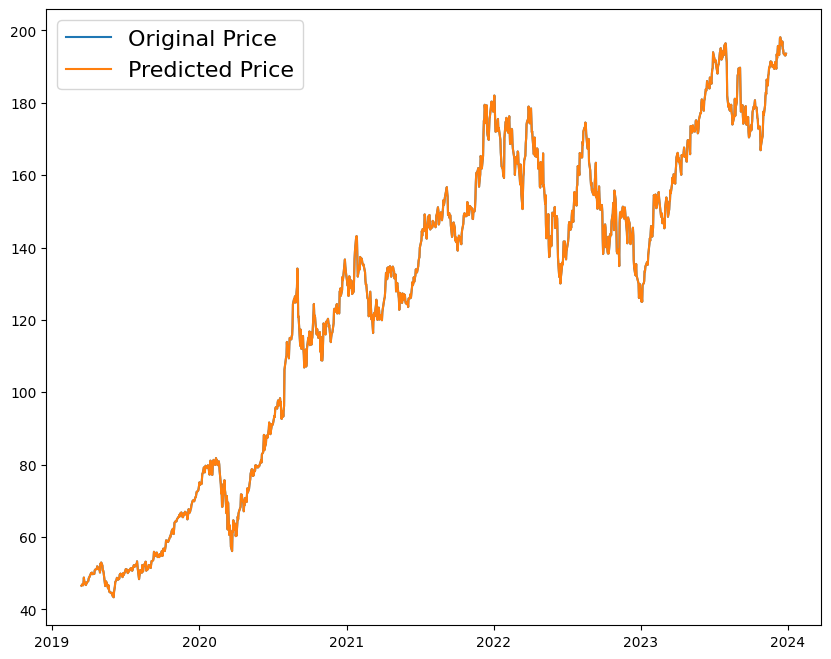

In [21]:
plt.figure(figsize=(10,8))
plt.plot(test_data)
plt.plot(_df['Predicted Value'])
plt.legend(('Original Price', 'Predicted Price'), fontsize=16)

In [22]:
# Error Metrics and Final Adjustments
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate errors
mse = mean_squared_error(test_data, _df['Predicted Value'])
mae = mean_absolute_error(test_data, _df['Predicted Value'])
rmse = np.sqrt(mse)
r2 = r2_score(test_data, _df['Predicted Value'])

# Display error metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r2}")

Mean Squared Error (MSE): 5.437715601854862e-31
Mean Absolute Error (MAE): 4.1207946564380295e-17
Root Mean Squared Error (RMSE): 7.374086792176277e-16
R-Squared: 1.0


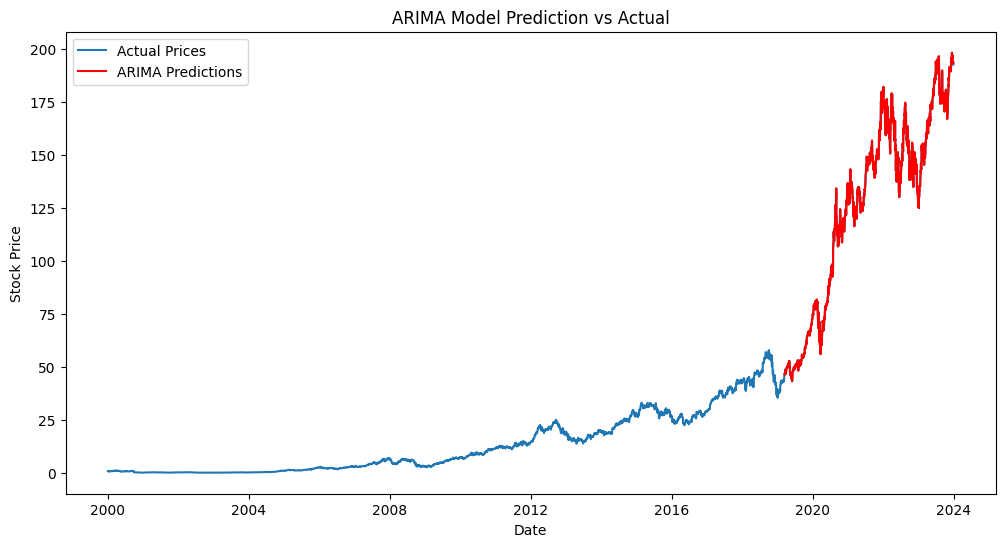

In [26]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Prices')  # Use data.index instead of data['Date']
plt.plot(test_data.index, _df['Predicted Value'], label='ARIMA Predictions', color='red')  # Use test_data.index and _df['Predicted Value']
plt.title('ARIMA Model Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()